# Pruebas por sujeto de estudio

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [58]:
RANGE_VISUALIZ = [35.0, 38.0] # Rango de temperaturas para la visualización

fecha_ref = pd.Timestamp('2025-01-01 00:00:00').floor('h') # Para alinear las gráficas

In [59]:
with open("../procData/muestras_ovul_horas_norm1.pkl", "rb") as f:
    muestras_ovul_alin = pickle.load(f)

In [60]:
with open("../procData/muestras_ovul_horas_norm2.pkl", "rb") as f:
    muestras_ovul_norm = pickle.load(f)

In [61]:
with open("../procData/muestras_ovul_horas.pkl", "rb") as f:
    muestras_ovul = pickle.load(f)

In [62]:
with open("../procData/muestras_ovul_tend.pkl", "rb") as f:
    muestras_ovul_tend = pickle.load(f)

### Series por sujeto de estudio

In [63]:
series_por_sujeto = {}

for nombre_serie in muestras_ovul:
    id_sujeto = nombre_serie.split("_")[0]  # Extrae el identificador antes del guion bajo

    if id_sujeto not in series_por_sujeto:
        series_por_sujeto[id_sujeto] = []

    series_por_sujeto[id_sujeto].append(nombre_serie)

series_por_sujeto

{'TU021': ['TU021_1', 'TU021_2'],
 'AN009': ['AN009_2', 'AN009_3'],
 'AN010': ['AN010_3'],
 'AN014': ['AN014_1'],
 'TU030': ['TU030_2'],
 'TU013': ['TU013_2'],
 'AN004': ['AN004_1'],
 'TU017': ['TU017_1', 'TU017_2', 'TU017_4'],
 'TU001': ['TU001_1'],
 'TU046': ['TU046_1', 'TU046_2', 'TU046_3'],
 'TU036': ['TU036_4'],
 'TU003': ['TU003_1'],
 'TU033': ['TU033_2'],
 'TU061': ['TU061_2'],
 'TU004': ['TU004_2'],
 'AN003': ['AN003_1'],
 'AN001': ['AN001_1', 'AN001_2', 'AN001_3'],
 'TU006': ['TU006_1'],
 'TU019': ['TU019_2'],
 'TU060': ['TU060_2'],
 'TU044': ['TU044_1'],
 'TU015': ['TU015_1'],
 'TU018': ['TU018_1'],
 'TU063': ['TU063_1', 'TU063_2', 'TU063_3'],
 'TU074': ['TU074_1', 'TU074_2', 'TU074_3', 'TU074_4'],
 'TU038': ['TU038_1', 'TU038_2', 'TU038_3'],
 'AN007': ['AN007_1', 'AN007_2', 'AN007_3'],
 'TU034': ['TU034_2'],
 'TU054': ['TU054_1'],
 'AN008': ['AN008_1', 'AN008_2'],
 'TU080': ['TU080_1'],
 'TU075': ['TU075_1'],
 'TU067': ['TU067_2'],
 'TU023': ['TU023_1', 'TU023_2'],
 'TU078':

In [64]:
def print_sujetos(lista_sujetos):
    fecha_ref = pd.Timestamp('2025-01-01 00:00:00').floor('h')

    for id_sujeto in lista_sujetos:
        lista_series = series_por_sujeto[id_sujeto]
        n_series = len(lista_series)

        n_cols = 1
        n_rows = n_series

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows), sharex=True, sharey=True)
        fig.suptitle(f'Sujeto {id_sujeto}', fontsize=16)

        # Asegurar que axes sea siempre iterable
        if n_series == 1:
            axes = [axes]
        else:
            axes = axes.flatten()

        for i, serie_id in enumerate(lista_series):
            datos = muestras_ovul[serie_id]["serie"]

            x = (datos["resultTimestamp"] - fecha_ref) / pd.Timedelta(days=1)
            y = datos["result"]

            ax = axes[i]
            ax.scatter(x, y, s=10, alpha=1.0, c="#2980B9")
            ax.axvline(x=0, color='red', linestyle='--', linewidth=1.5)
            ax.set_title(f'Serie {serie_id}')
            ax.set_ylim(RANGE_VISUALIZ[0], RANGE_VISUALIZ[1])
            ax.grid(True)

        # Etiquetas comunes
        fig.text(0.5, 0.04, 'Día relativo a la ovulación', ha='center')
        fig.text(0.04, 0.5, 'Temperatura (°C)', va='center', rotation='vertical')

        plt.tight_layout(rect=[0.04, 0.04, 1, 0.96])
        plt.show()


### Sujetos con más de una serie

In [65]:
np.unique([len(series) for sujeto, series in series_por_sujeto.items()], return_counts=True)

(array([1, 2, 3, 4]), array([26,  5,  7,  1]))

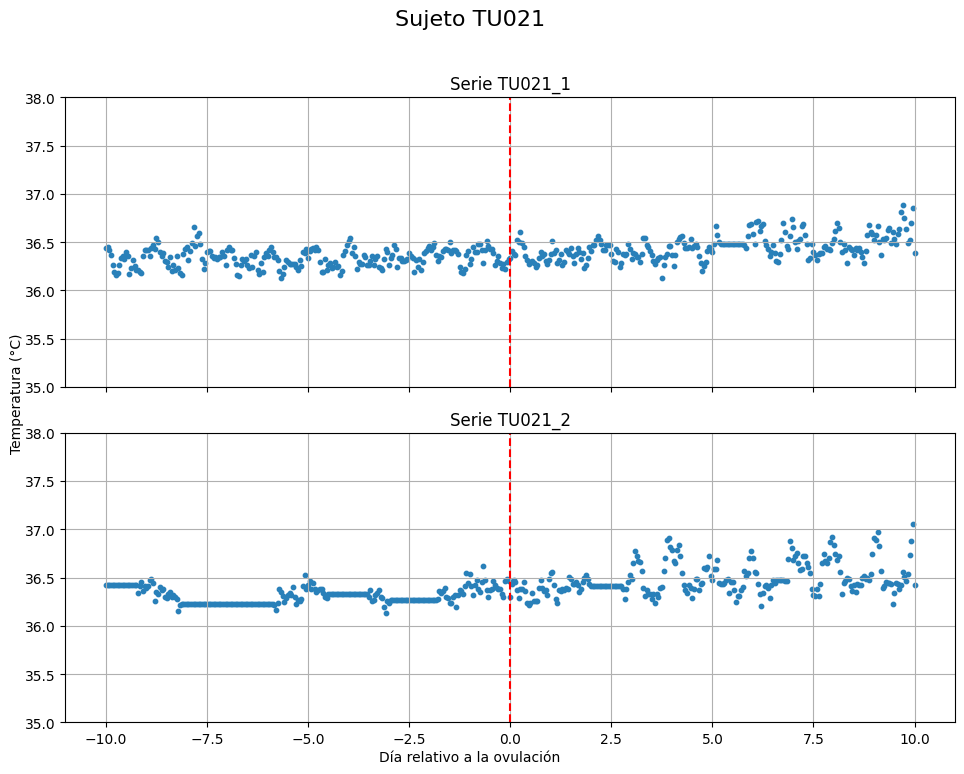

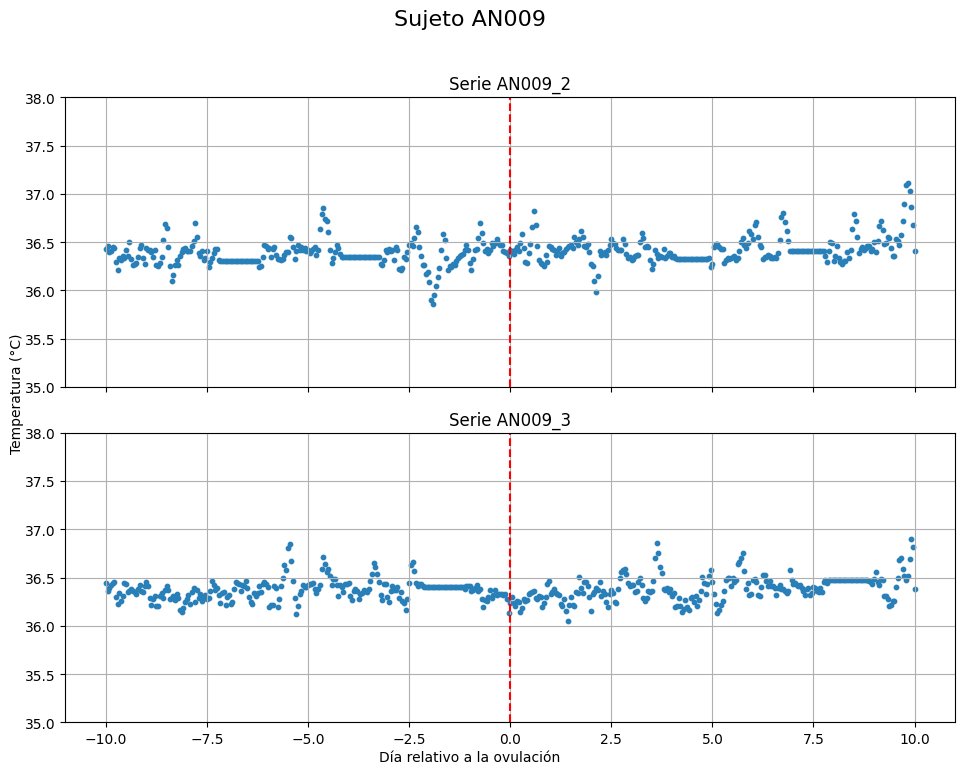

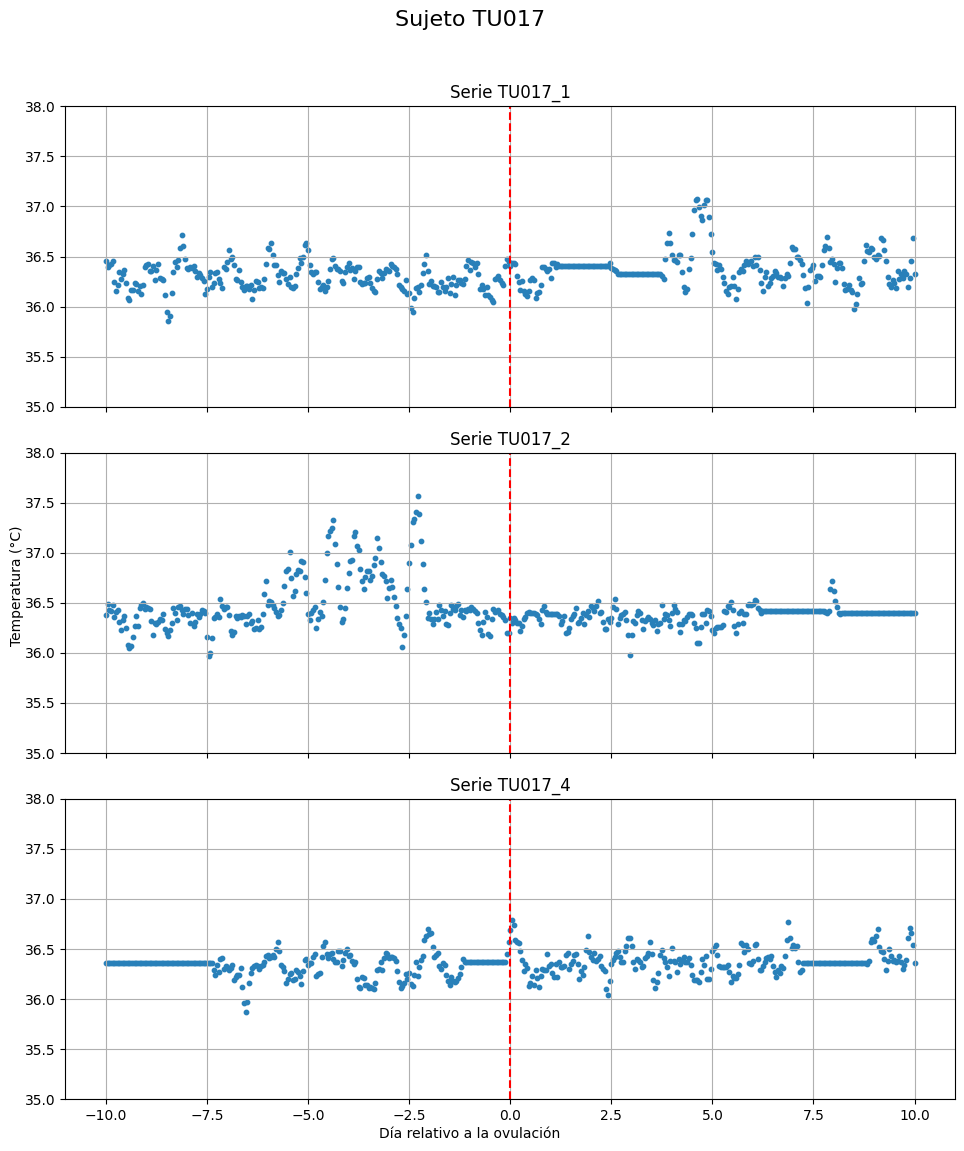

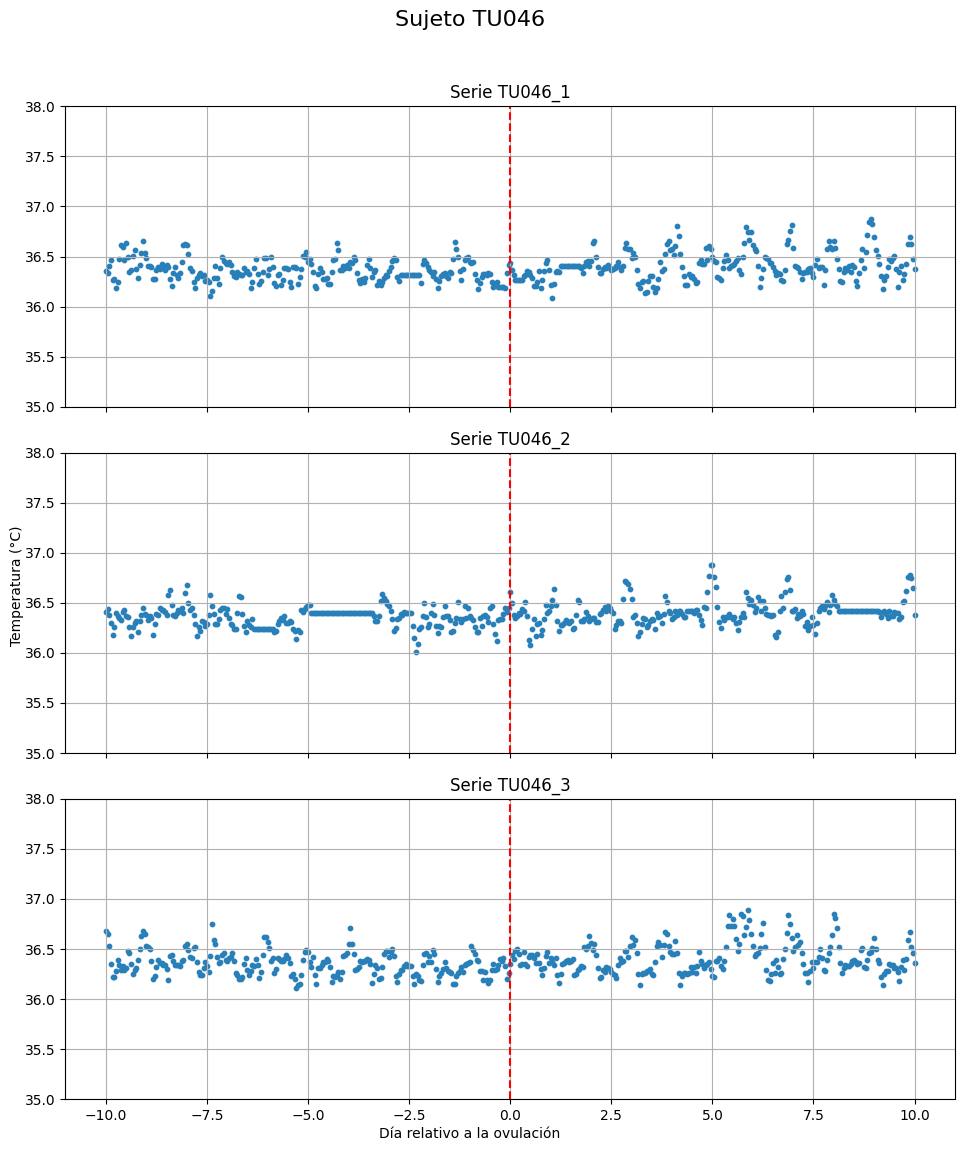

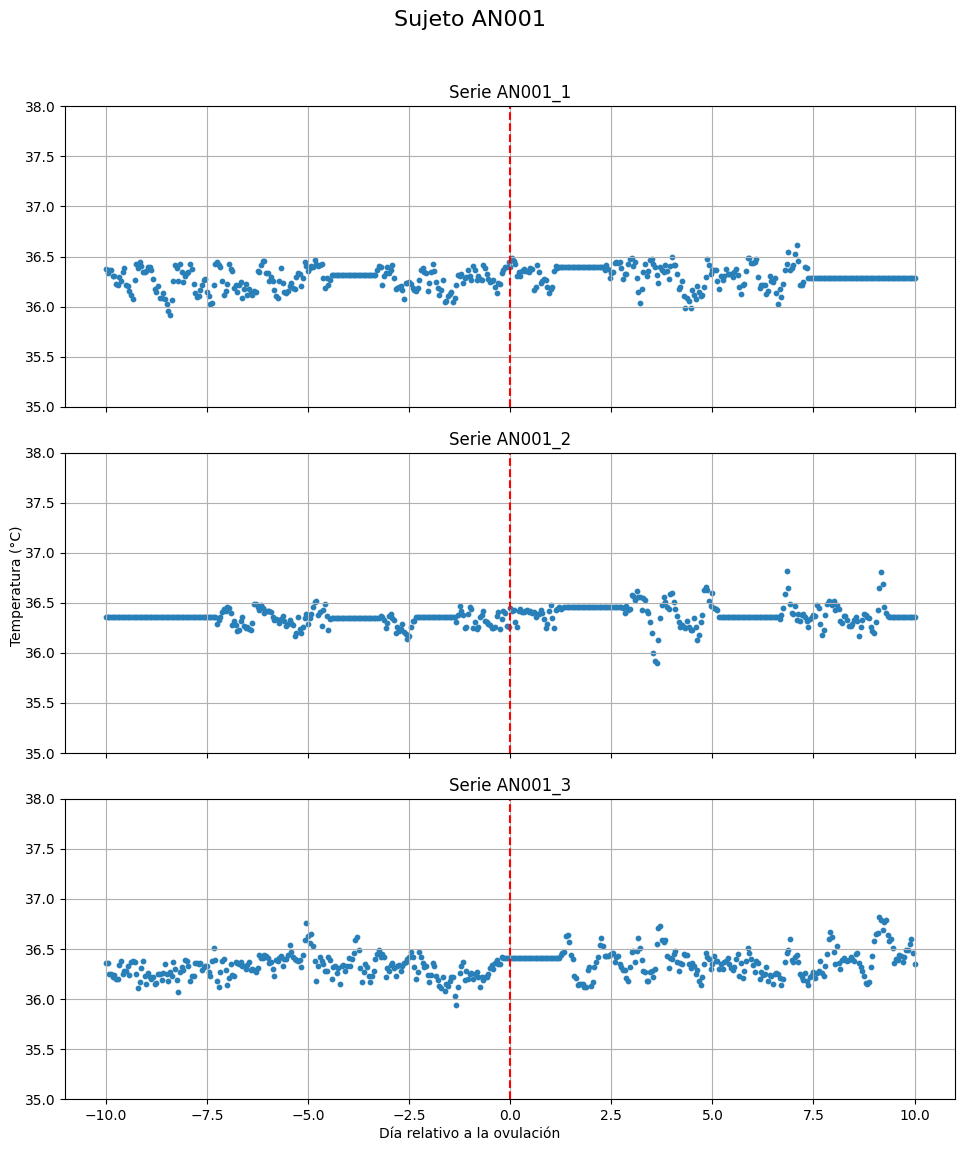

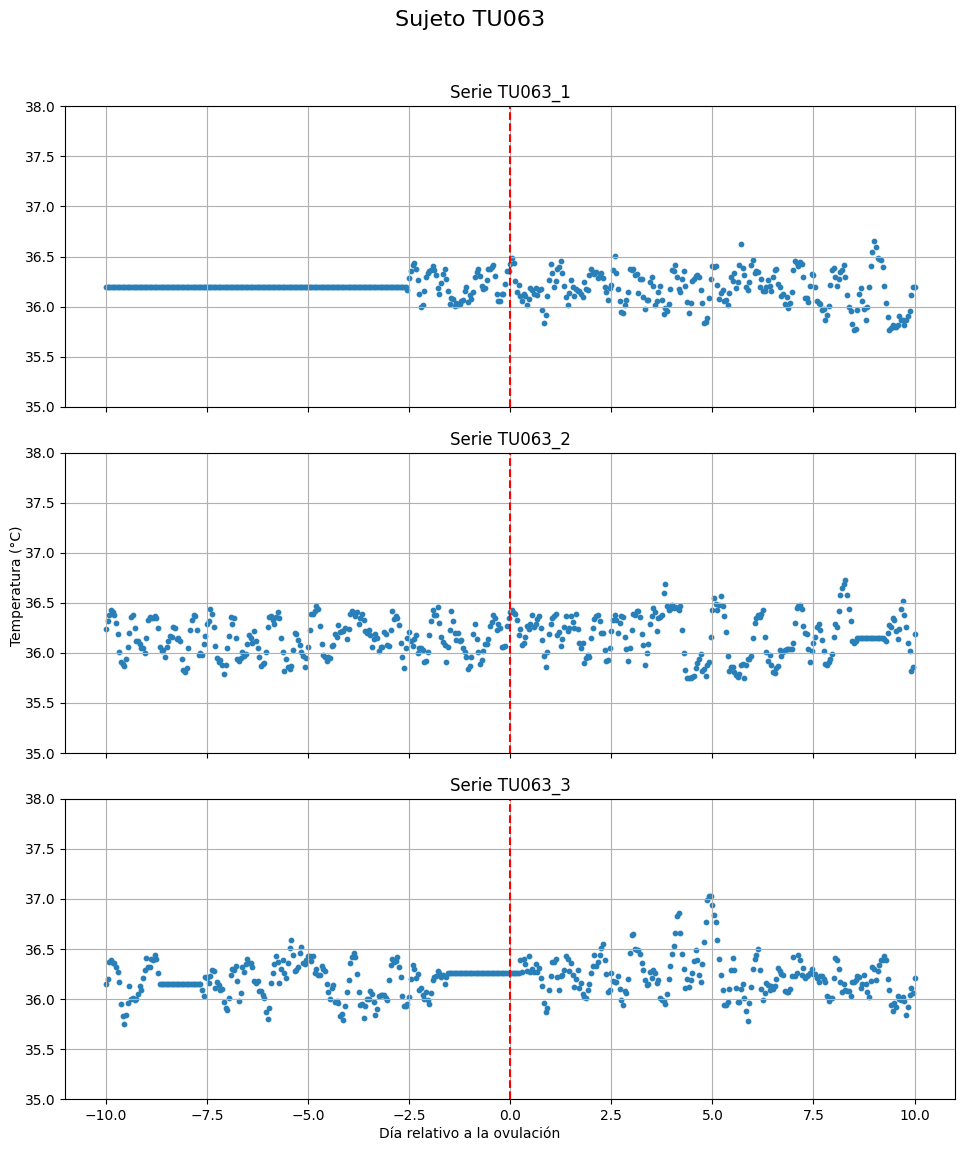

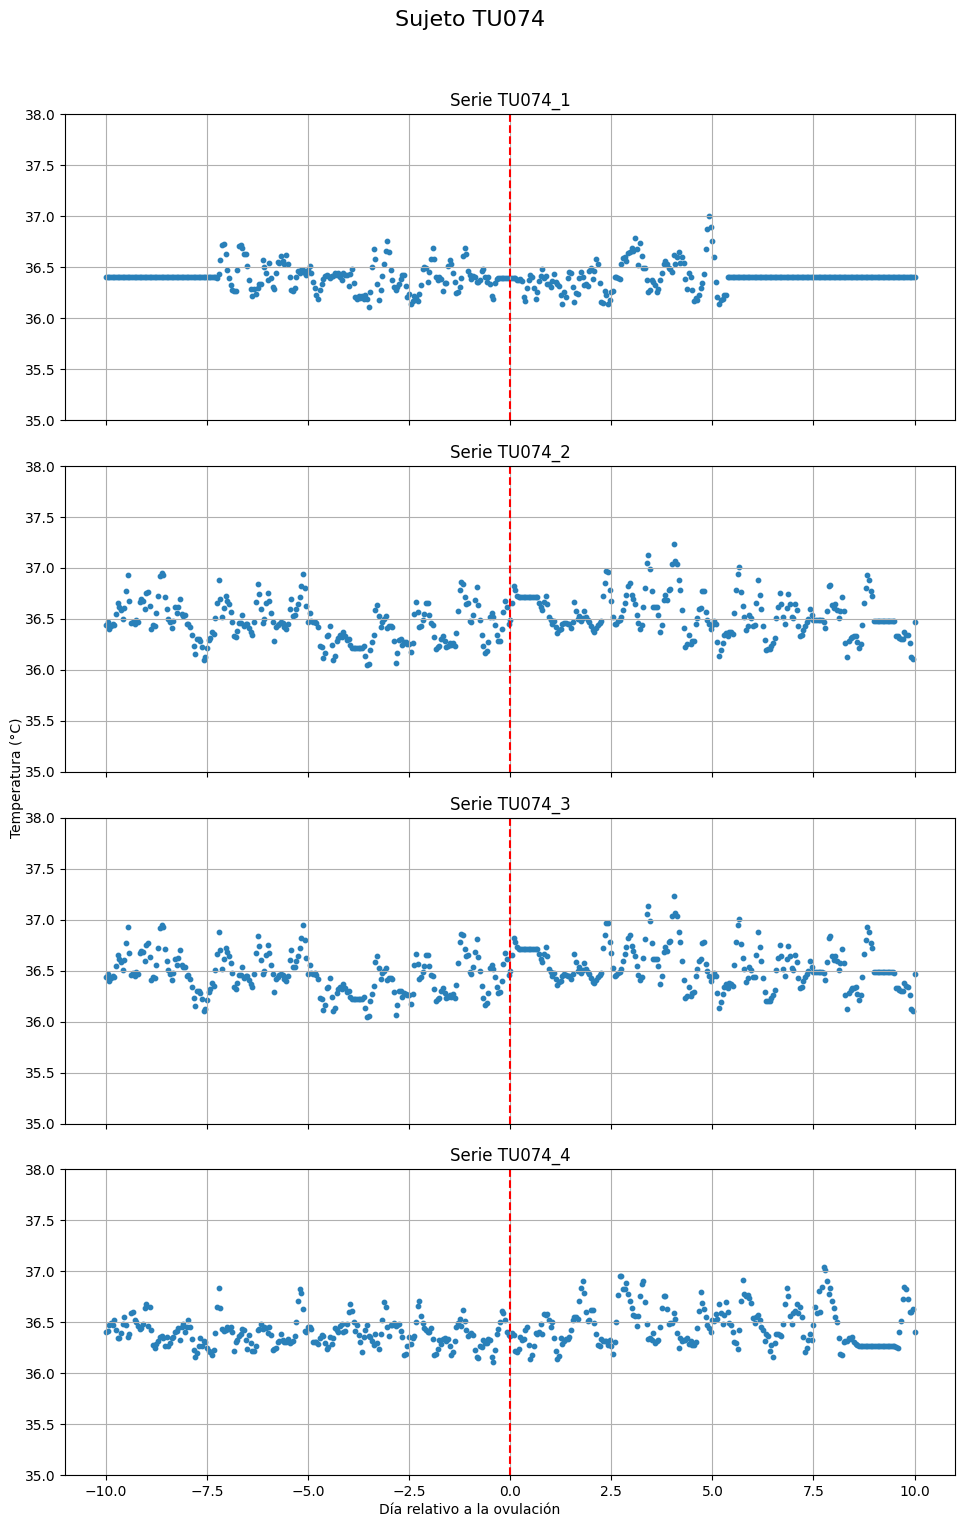

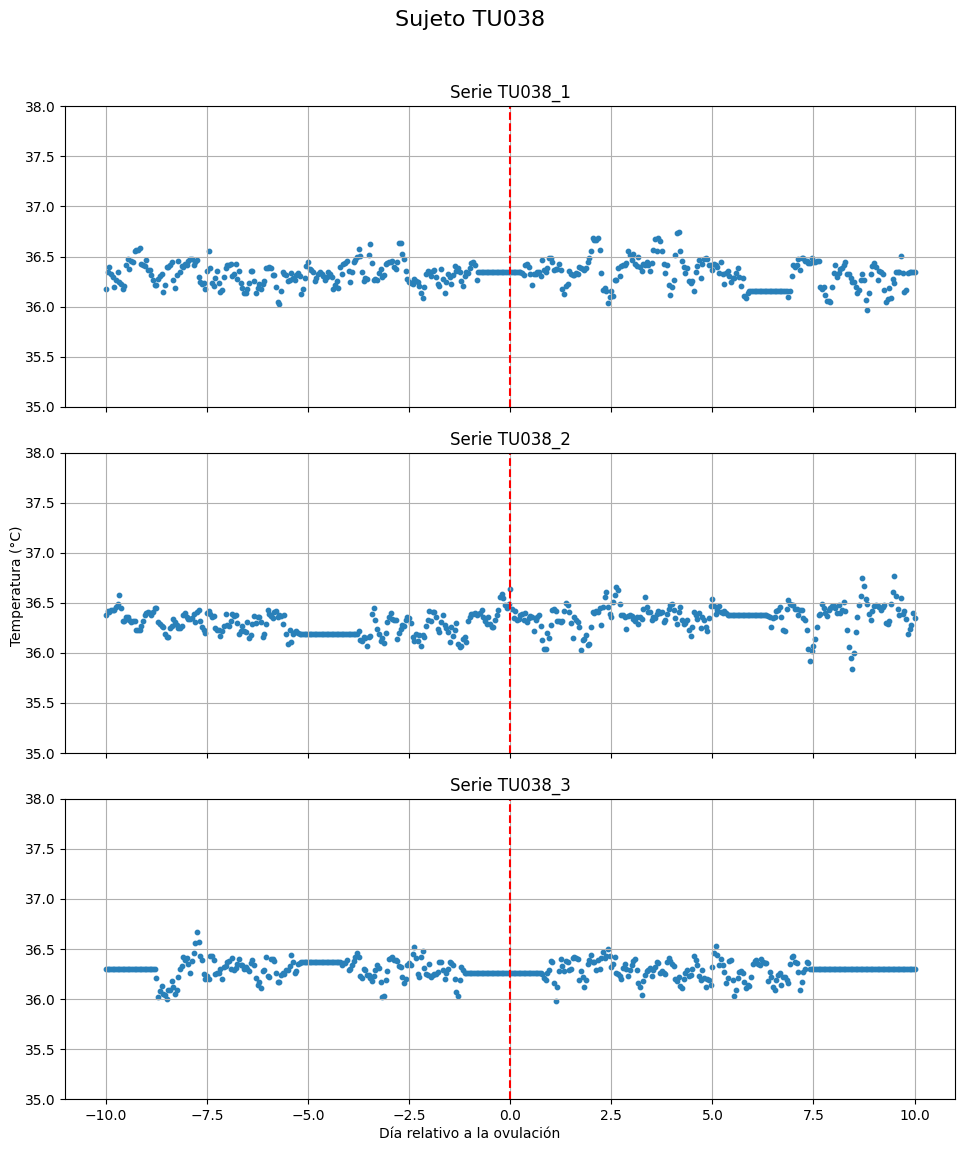

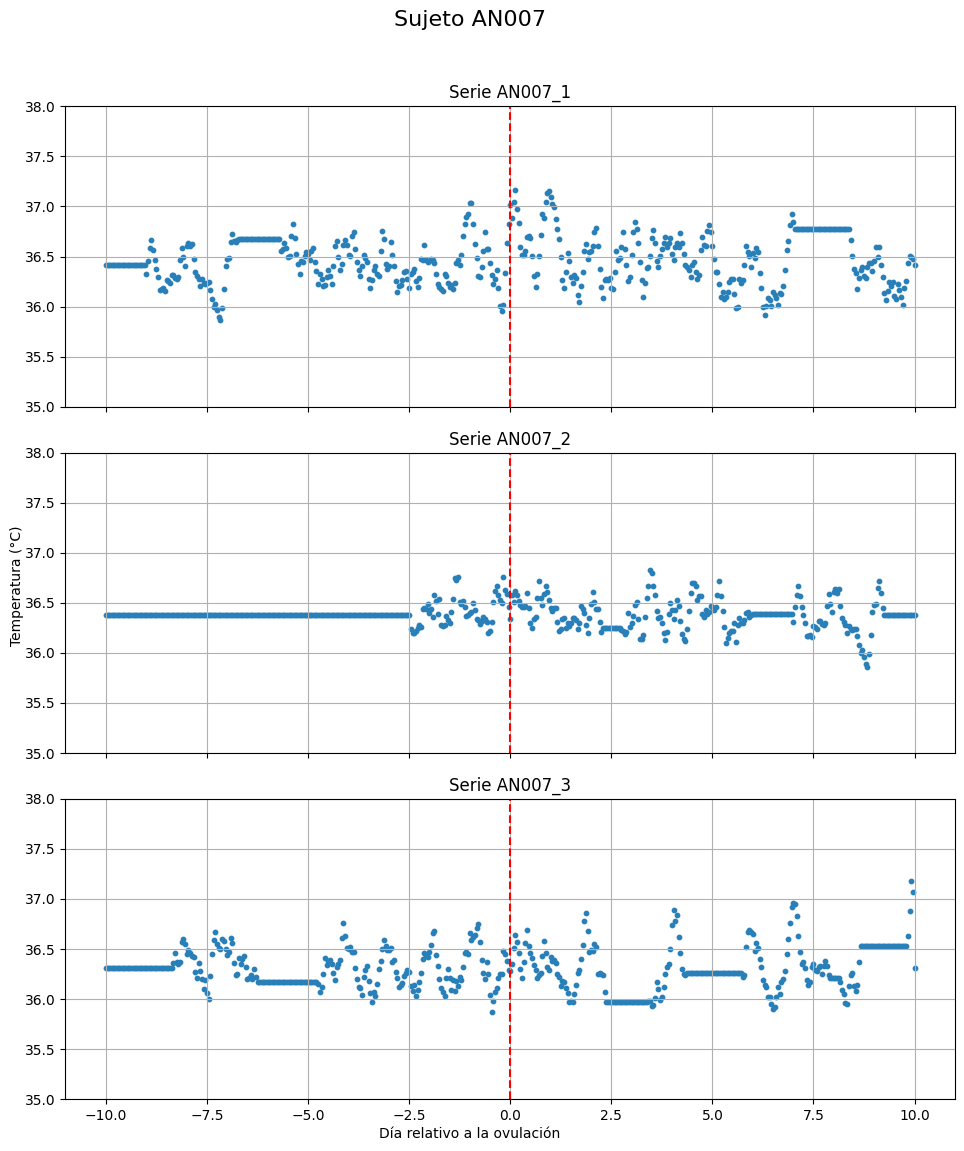

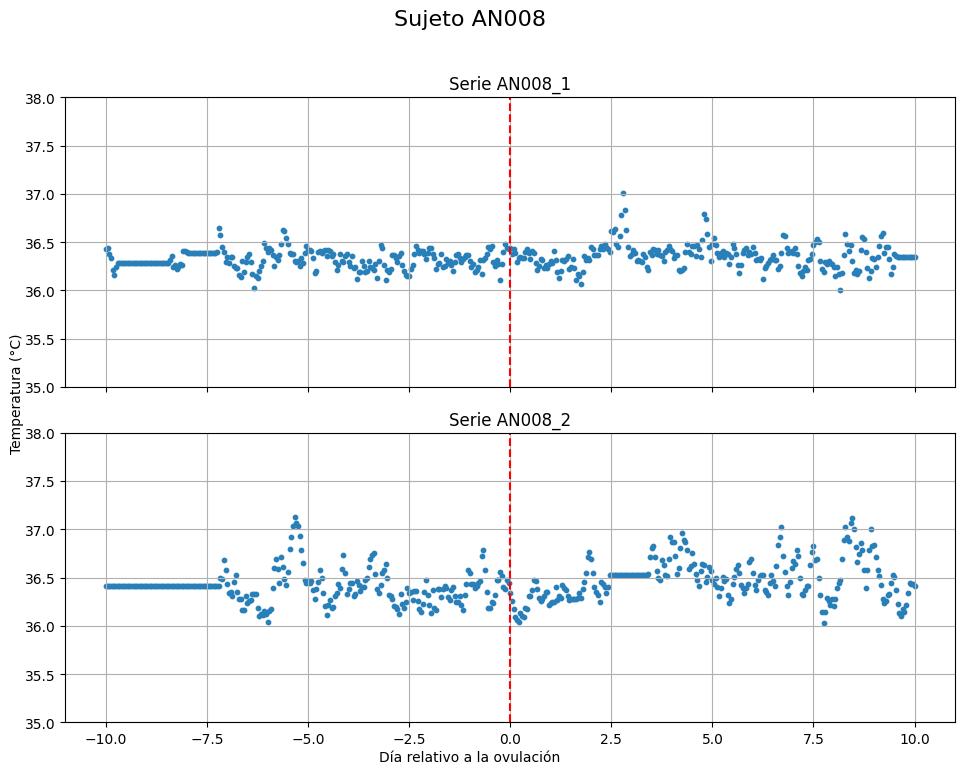

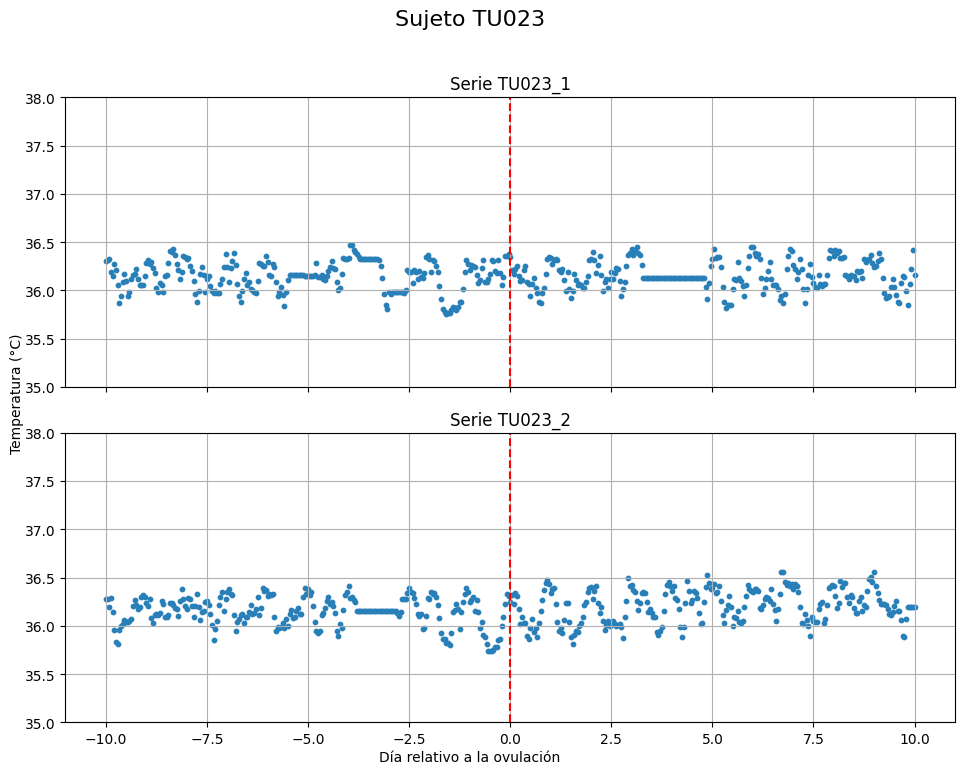

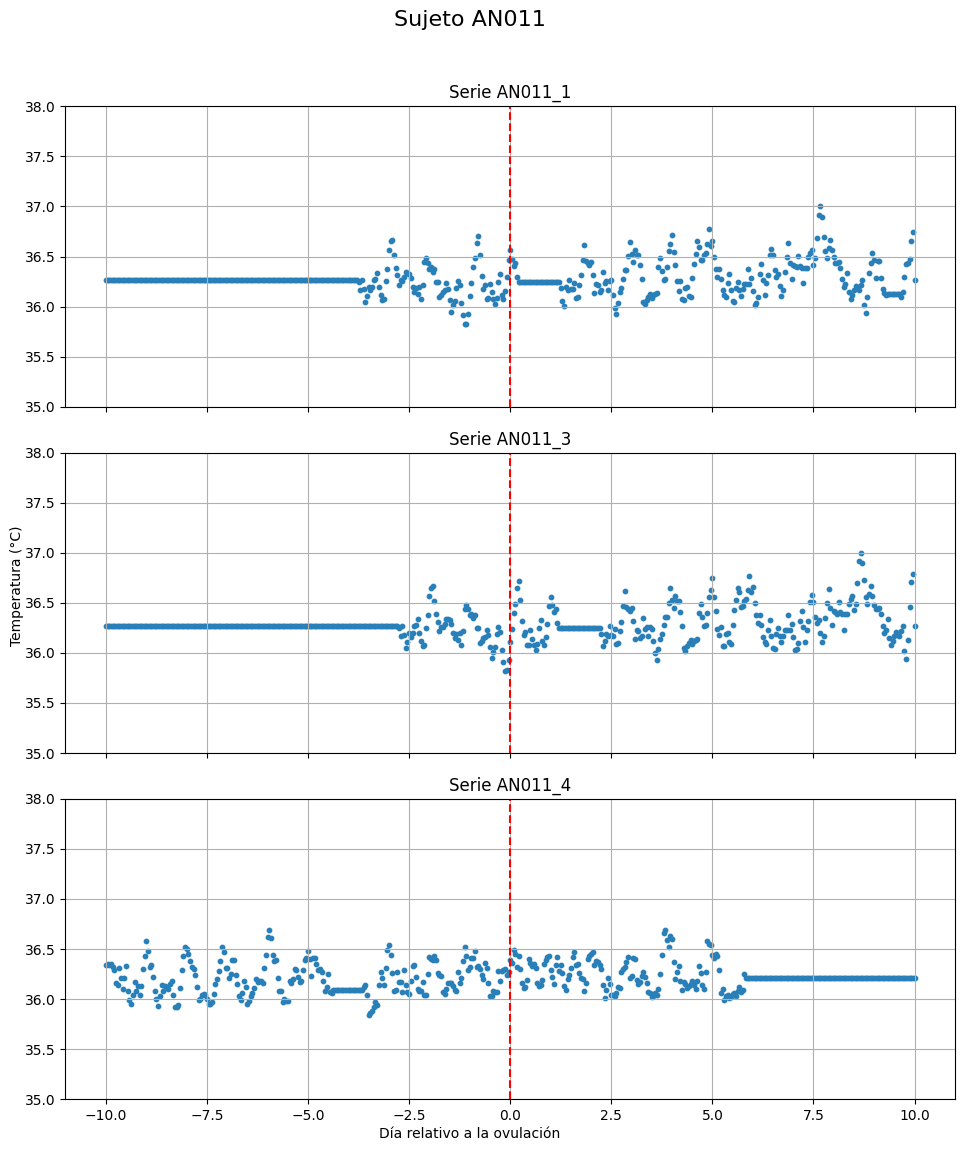

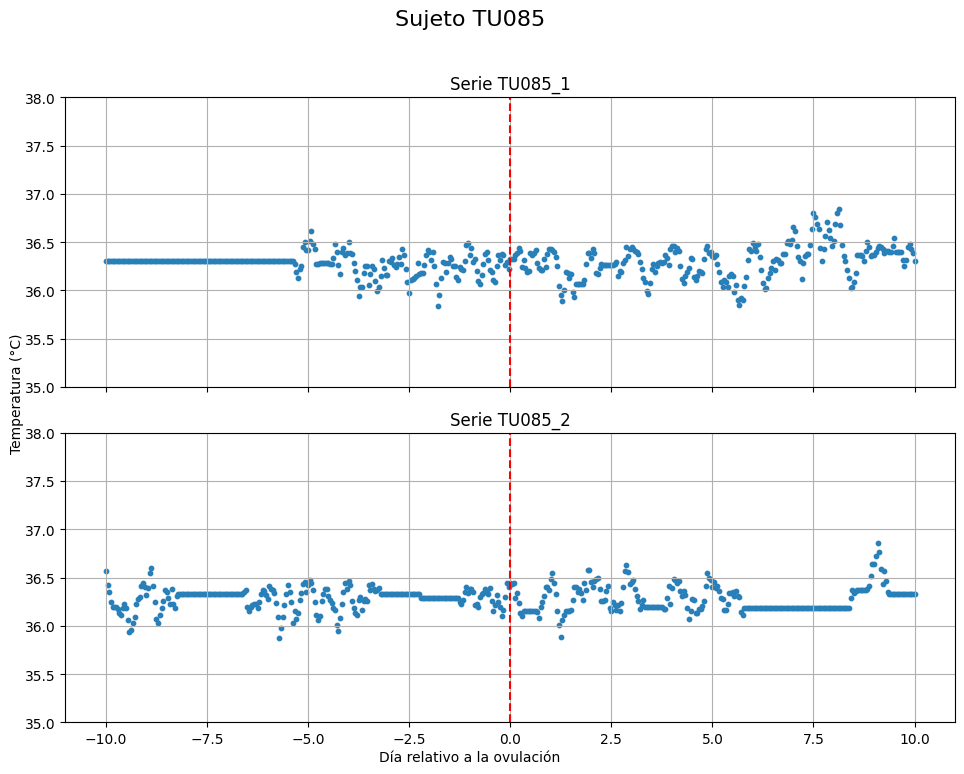

In [66]:
# Filtrar sujetos con más de una serie
sujetos_con_varias_series = [sujeto for sujeto, series in series_por_sujeto.items() if len(series) > 1]

# Mostrarlos gráficamente
print_sujetos(sujetos_con_varias_series)

In [67]:
# Vemos que las series "AN011_3" y "TU074_3" tienen réplicas prácticamente exactas
ids_series_repetidas = ["AN011_3","TU074_3"]

In [68]:
for id in ids_series_repetidas:
    del muestras_ovul_norm[id]
    del muestras_ovul_alin[id]
    del muestras_ovul_tend[id]
    del muestras_ovul[id]

In [69]:
name_series = muestras_ovul.keys()
print(len(name_series))

name_series_alin = muestras_ovul_alin.keys()
print(len(name_series_alin))

name_series_norm = muestras_ovul_norm.keys()
print(len(name_series_norm))

name_series_tend = muestras_ovul_tend.keys()
print(len(name_series_tend))

59
59
59
59


In [70]:
with open("../procData/muestras_ovul_horas_norm1.pkl", "wb") as f:
    pickle.dump(muestras_ovul_alin, f)

with open("../procData/muestras_ovul_horas_norm2.pkl", "wb") as f:
    pickle.dump(muestras_ovul_norm, f)

with open("../procData/muestras_ovul_horas.pkl", "wb") as f:
    pickle.dump(muestras_ovul, f)

with open("../procData/muestras_ovul_tend.pkl", "wb") as f:
    pickle.dump(muestras_ovul_tend, f)

In [71]:
series_por_sujeto = {}

for nombre_serie in muestras_ovul:
    id_sujeto = nombre_serie.split("_")[0]  # Extrae el identificador antes del guion bajo

    if id_sujeto not in series_por_sujeto:
        series_por_sujeto[id_sujeto] = []

    series_por_sujeto[id_sujeto].append(nombre_serie)

In [72]:
np.unique([len(series) for sujeto, series in series_por_sujeto.items()], return_counts=True)

(array([1, 2, 3]), array([26,  6,  7]))

In [73]:
sujetos_con_varias_series = [sujeto for sujeto, series in series_por_sujeto.items() if len(series) > 1]


Sujeto TU021 - Media de cada serie:
  • TU021_1: 36.39 °C
  • TU021_2: 36.40 °C


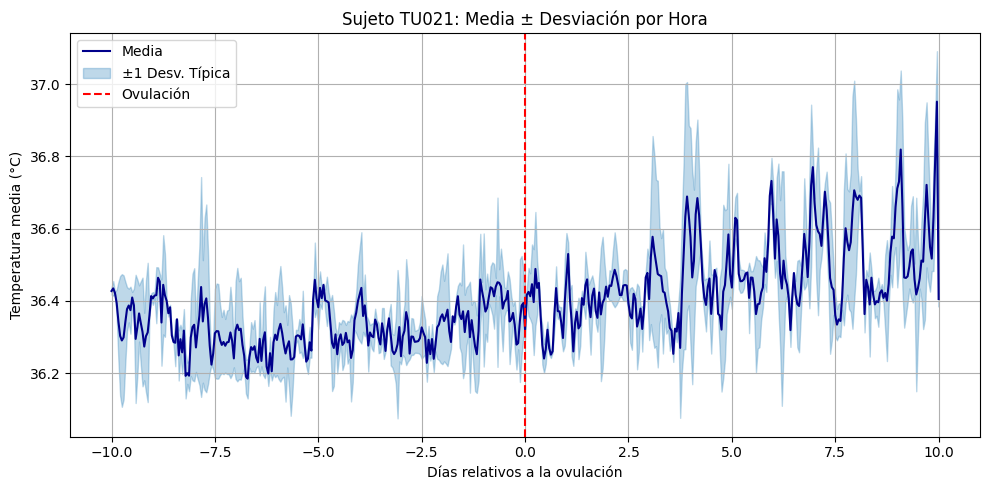


Sujeto AN009 - Media de cada serie:
  • AN009_2: 36.40 °C
  • AN009_3: 36.38 °C


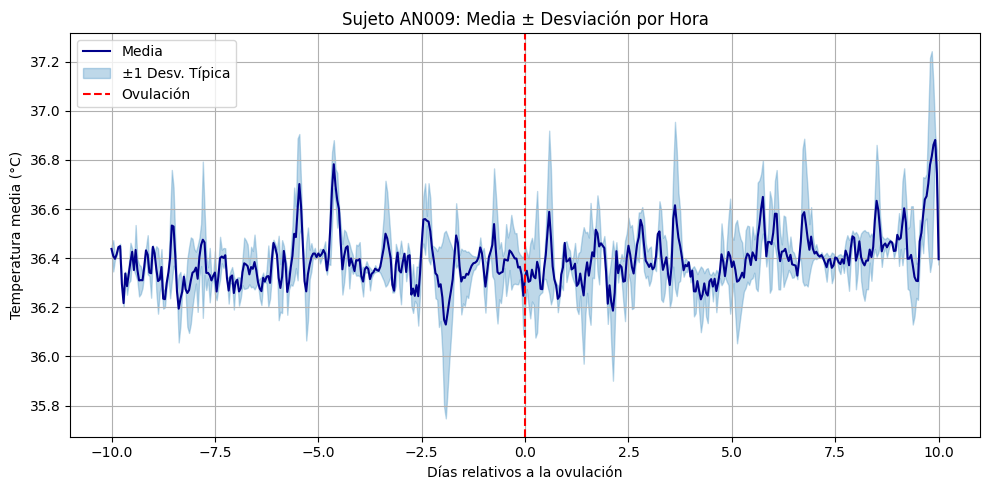


Sujeto TU017 - Media de cada serie:
  • TU017_1: 36.34 °C
  • TU017_2: 36.44 °C
  • TU017_4: 36.36 °C


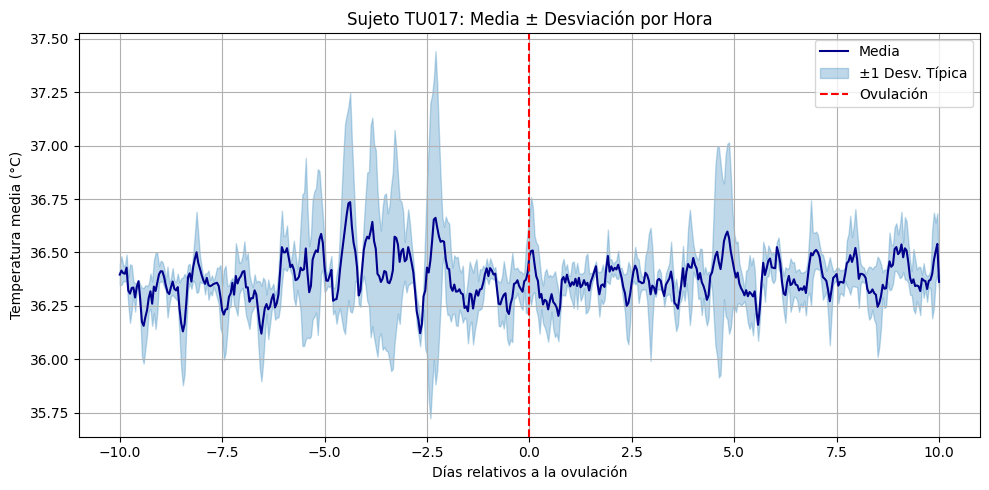


Sujeto TU046 - Media de cada serie:
  • TU046_1: 36.39 °C
  • TU046_2: 36.38 °C
  • TU046_3: 36.38 °C


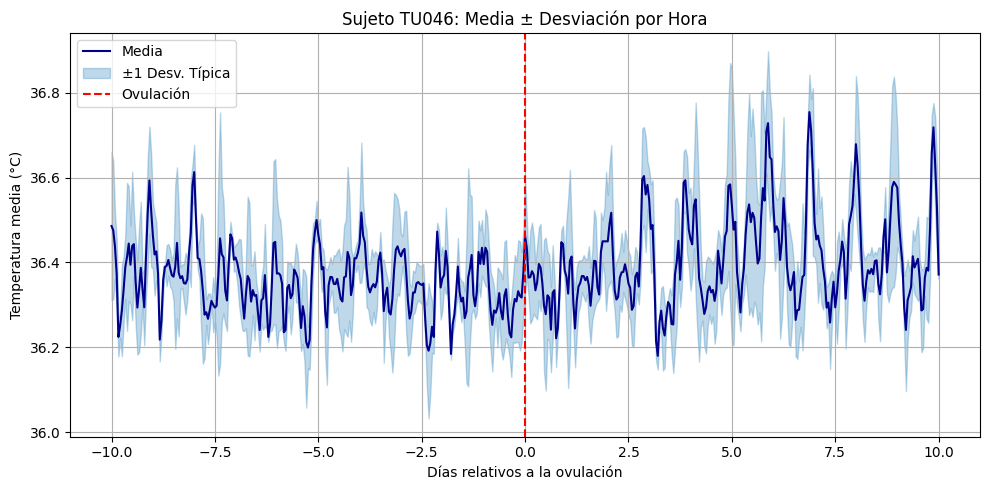


Sujeto AN001 - Media de cada serie:
  • AN001_1: 36.29 °C
  • AN001_2: 36.37 °C
  • AN001_3: 36.35 °C


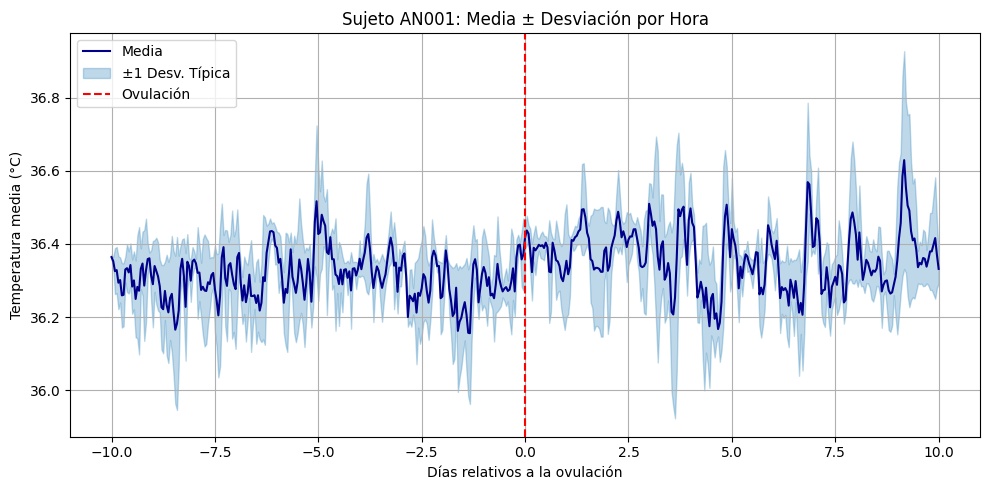


Sujeto TU063 - Media de cada serie:
  • TU063_1: 36.19 °C
  • TU063_2: 36.16 °C
  • TU063_3: 36.21 °C


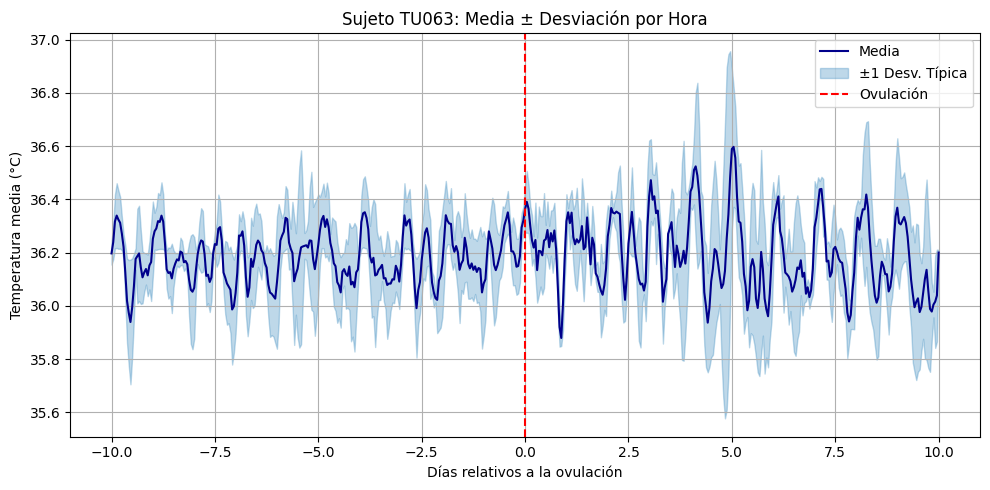


Sujeto TU074 - Media de cada serie:
  • TU074_1: 36.40 °C
  • TU074_2: 36.50 °C
  • TU074_4: 36.43 °C


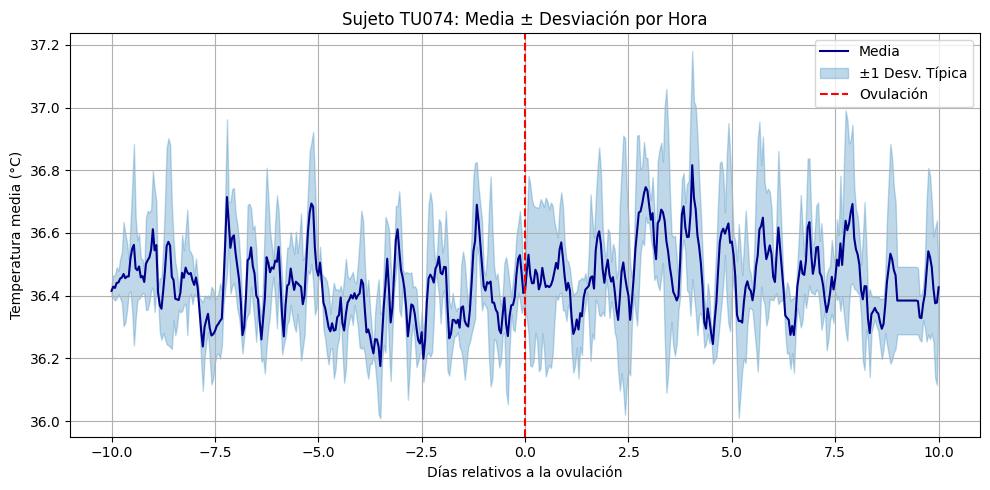


Sujeto TU038 - Media de cada serie:
  • TU038_1: 36.33 °C
  • TU038_2: 36.32 °C
  • TU038_3: 36.29 °C


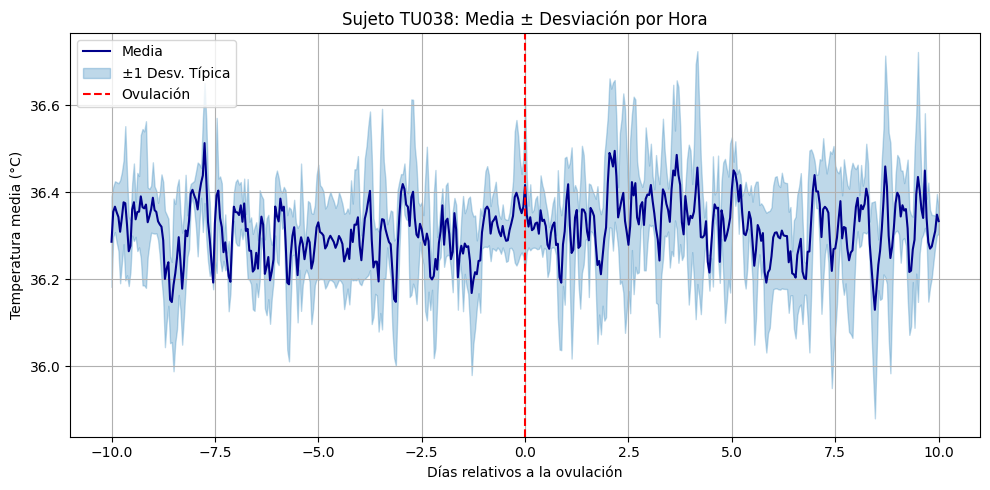


Sujeto AN007 - Media de cada serie:
  • AN007_1: 36.46 °C
  • AN007_2: 36.38 °C
  • AN007_3: 36.31 °C


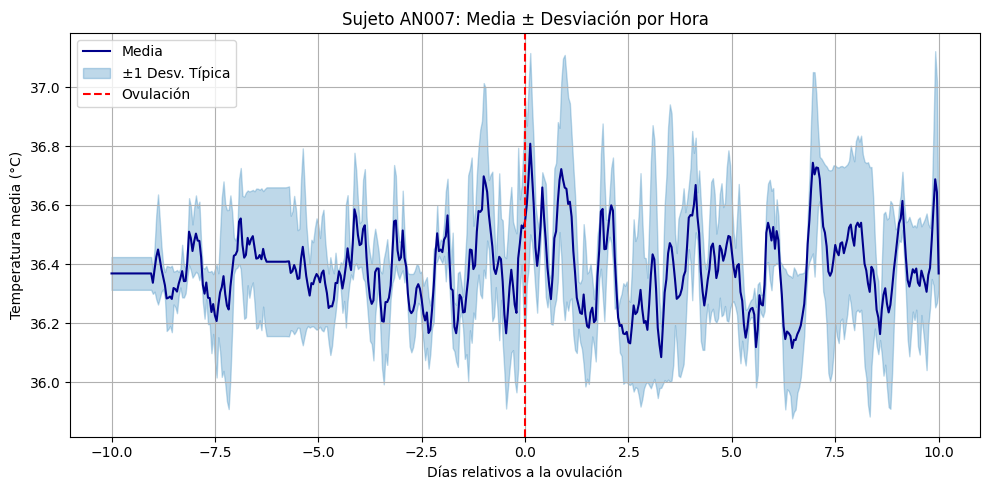


Sujeto AN008 - Media de cada serie:
  • AN008_1: 36.34 °C
  • AN008_2: 36.45 °C


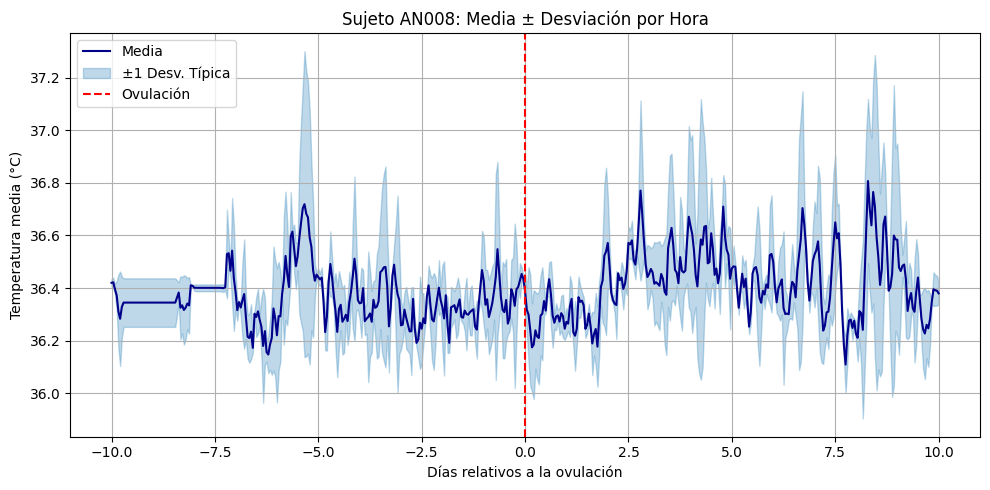


Sujeto TU023 - Media de cada serie:
  • TU023_1: 36.15 °C
  • TU023_2: 36.18 °C


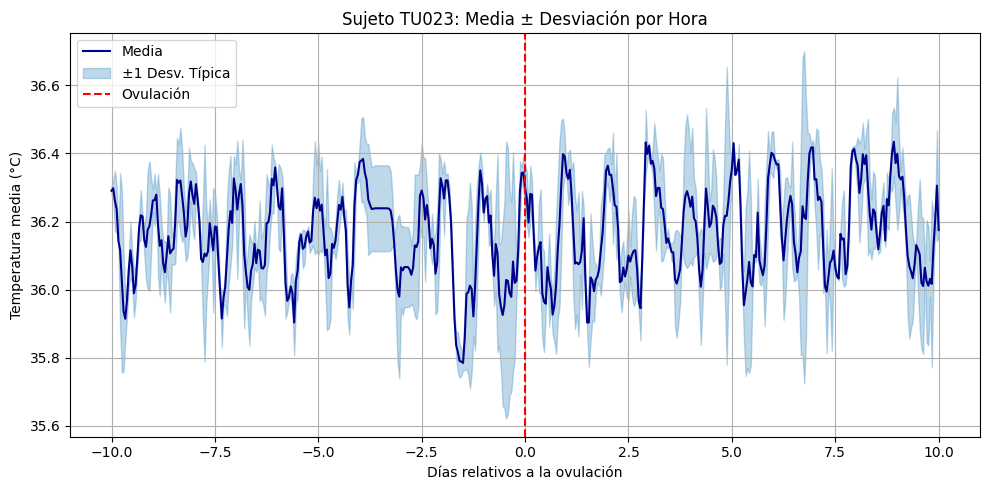


Sujeto AN011 - Media de cada serie:
  • AN011_1: 36.28 °C
  • AN011_4: 36.22 °C


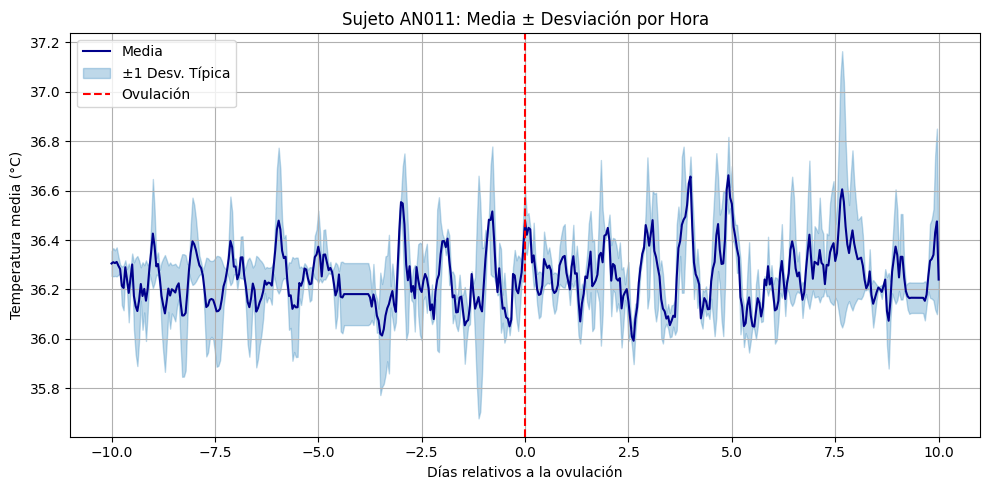


Sujeto TU085 - Media de cada serie:
  • TU085_1: 36.29 °C
  • TU085_2: 36.28 °C


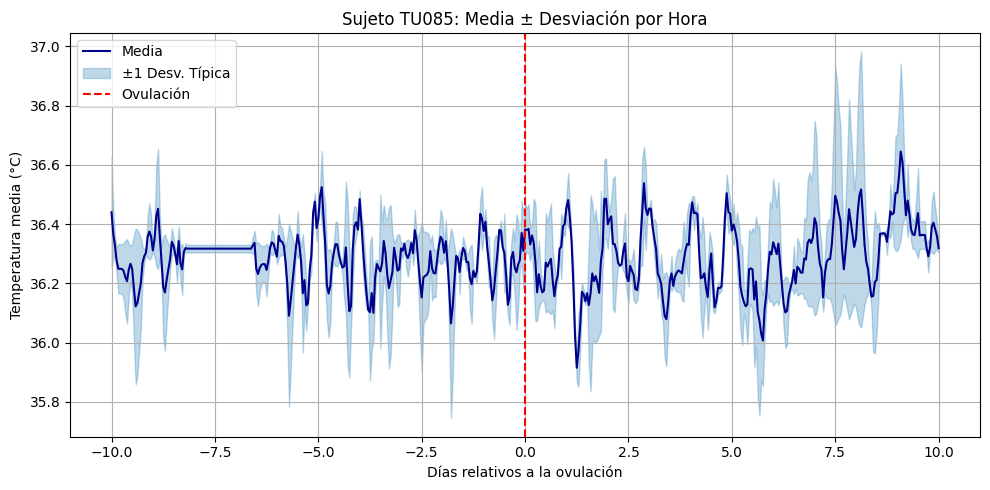

In [74]:
for sujeto, lista_series in series_por_sujeto.items():
    if len(lista_series) <= 1:
        continue  # Saltar sujetos con solo una serie

    series_data = []

    print(f"\nSujeto {sujeto} - Media de cada serie:")

    for serie_id in lista_series:
        df = muestras_ovul[serie_id]["serie"].copy()
        media_serie = df["result"].mean()
        print(f"  • {serie_id}: {media_serie:.2f} °C")

        df["dias_rel"] = (df["resultTimestamp"] - fecha_ref) / pd.Timedelta(days=1)
        df = df.set_index("dias_rel").sort_index()
        series_data.append(df["result"])

    # Combinar todas las series horarias por día relativo
    df_comb = pd.concat(series_data, axis=1, join="inner")
    df_comb.columns = lista_series  # Etiquetar columnas con el ID de cada serie

    # Calcular media y desviación típica
    media = df_comb.mean(axis=1)
    std = df_comb.std(axis=1)

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(media.index, media, color='darkblue', label='Media')
    plt.fill_between(media.index, media - std, media + std, color="#2980B9", alpha=0.3, label='±1 Desv. Típica')
    plt.axvline(0, color='red', linestyle='--', label='Ovulación')

    plt.title(f"Sujeto {sujeto}: Media ± Desviación por Hora")
    plt.xlabel("Días relativos a la ovulación")
    plt.ylabel("Temperatura media (°C)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [75]:
series_por_sujeto

{'TU021': ['TU021_1', 'TU021_2'],
 'AN009': ['AN009_2', 'AN009_3'],
 'AN010': ['AN010_3'],
 'AN014': ['AN014_1'],
 'TU030': ['TU030_2'],
 'TU013': ['TU013_2'],
 'AN004': ['AN004_1'],
 'TU017': ['TU017_1', 'TU017_2', 'TU017_4'],
 'TU001': ['TU001_1'],
 'TU046': ['TU046_1', 'TU046_2', 'TU046_3'],
 'TU036': ['TU036_4'],
 'TU003': ['TU003_1'],
 'TU033': ['TU033_2'],
 'TU061': ['TU061_2'],
 'TU004': ['TU004_2'],
 'AN003': ['AN003_1'],
 'AN001': ['AN001_1', 'AN001_2', 'AN001_3'],
 'TU006': ['TU006_1'],
 'TU019': ['TU019_2'],
 'TU060': ['TU060_2'],
 'TU044': ['TU044_1'],
 'TU015': ['TU015_1'],
 'TU018': ['TU018_1'],
 'TU063': ['TU063_1', 'TU063_2', 'TU063_3'],
 'TU074': ['TU074_1', 'TU074_2', 'TU074_4'],
 'TU038': ['TU038_1', 'TU038_2', 'TU038_3'],
 'AN007': ['AN007_1', 'AN007_2', 'AN007_3'],
 'TU034': ['TU034_2'],
 'TU054': ['TU054_1'],
 'AN008': ['AN008_1', 'AN008_2'],
 'TU080': ['TU080_1'],
 'TU075': ['TU075_1'],
 'TU067': ['TU067_2'],
 'TU023': ['TU023_1', 'TU023_2'],
 'TU078': ['TU078_1'

### Media global por sujeto de estudio

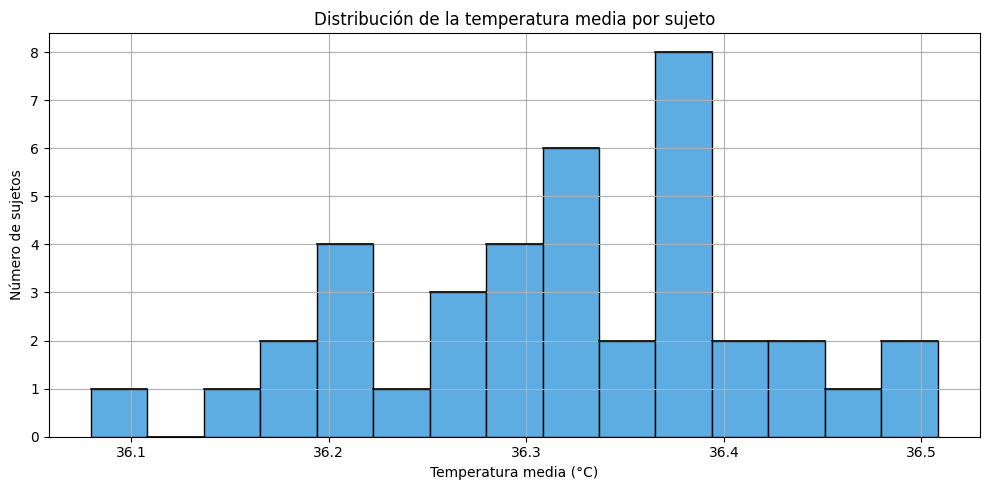

In [76]:
media_por_sujeto = {}

for sujeto, lista_series in series_por_sujeto.items():
    medias = []
    for serie_id in lista_series:
        df = muestras_ovul[serie_id]["serie"]
        media_serie = df["result"].mean()
        medias.append(media_serie)
    
    # Media del sujeto: una o más series
    media_sujeto = np.mean(medias)
    media_por_sujeto[sujeto] = media_sujeto

# Convertir a DataFrame para orden y visualización
df_medias = pd.DataFrame(list(media_por_sujeto.items()), columns=["sujeto", "media_temp"])
df_medias = df_medias.sort_values(by="media_temp")


# Histograma
plt.figure(figsize=(10, 5))

n, bins, patches = plt.hist(
    df_medias["media_temp"],
    bins=15,
    color="#5DADE2",         # azul más suave
    edgecolor="black"        # borde negro alrededor de cada barra
)

# Marcar el borde superior de cada barra
for patch in patches:
    height = patch.get_height()
    x = patch.get_x()
    width = patch.get_width()
    # Línea negra en la parte superior de cada barra
    plt.plot([x, x + width], [height, height], color='black', linewidth=1.2)

# Estética
plt.title("Distribución de la temperatura media por sujeto")
plt.xlabel("Temperatura media (°C)")
plt.ylabel("Número de sujetos")
plt.grid(True)
plt.tight_layout()
plt.show()


## Variabilidad interindividual e intraindividual
### Series alineadas

In [77]:
dist_inter_alin = []
dist_intra_alin = {}

for sujeto1, series1 in series_por_sujeto.items():
    if len(series1) > 1:
        dist_intra_alin[sujeto1] = []

    for i in range(len(series1)):
        serie_i = muestras_ovul_alin[series1[i]]["serie"]["result"].values

        for sujeto2, series2 in series_por_sujeto.items():
            for j in range(len(series2)):
                if sujeto1 == sujeto2 and i >= j:
                    continue  # Evitar repeticiones o autocomparación
                try:
                    serie_j = muestras_ovul_alin[series2[j]]["serie"]["result"].values

                    # Distancia Euclídea directa
                    if len(serie_i) == len(serie_j):  # Verificación de longitud
                        distancia = np.linalg.norm(serie_i - serie_j)

                        dist_inter_alin.append(distancia)

                        if sujeto1 == sujeto2 and len(series1) > 1:
                            dist_intra_alin[sujeto1].append(distancia)
                    else:
                        print(f"Longitudes desiguales: {series1[i]} vs {series2[j]}")
                except Exception as e:
                    print(f"Error comparando {series1[i]} y {series2[j]}: {e}")

In [78]:
# Media global de distancias inter-individuales
media_inter_alin = np.mean(dist_inter_alin)
print(f"Media de distancias inter-individuales: {media_inter_alin:.4f}")


# Medias de distancias intra-individuales por sujeto
medias_intra_alin = {}

for sujeto, distancias in dist_intra_alin.items():
    if len(distancias) > 0:
        medias_intra_alin[sujeto] = np.mean(distancias)
    else:
        medias_intra_alin[sujeto] = np.nan  # Por si algún sujeto terminó con lista vacía

for sujeto, media in medias_intra_alin.items():
    print(f"{sujeto}: media intra-individual = {media:.4f}")


Media de distancias inter-individuales: 4.3856
TU021: media intra-individual = 3.3917
AN009: media intra-individual = 3.5038
TU017: media intra-individual = 5.3460
TU046: media intra-individual = 3.2211
AN001: media intra-individual = 3.0316
TU063: media intra-individual = 4.9611
TU074: media intra-individual = 4.7706
TU038: media intra-individual = 3.6004
AN007: media intra-individual = 5.6176
AN008: media intra-individual = 4.7265
TU023: media intra-individual = 3.9132
AN011: media intra-individual = 4.1433
TU085: media intra-individual = 3.8741


In [79]:
# Test de Mann-Whitney
# Para comprobar estadísticamente si las distancias intraindividuales son menores que las interindivuduales

from scipy.stats import mannwhitneyu

dist_intra_alin_all = []
for dist_list in dist_intra_alin.values():
    dist_intra_alin_all.extend(dist_list)

stat, p = mannwhitneyu(dist_intra_alin_all, dist_inter_alin, alternative='less')

print(f"Estadístico: {stat}, p-valor: {p}")
if p < 0.05:
    print("Las distancias intraindividuales son significativamente menores que las interindividuales")
else:
    print("No hay evidencia suficiente para afirmar que las distancias intraindividuales sean menores.")


Estadístico: 40302.5, p-valor: 0.13976793943245036
No hay evidencia suficiente para afirmar que las distancias intraindividuales sean menores.


### Series normalizadas

In [80]:
dist_inter_norm = []
dist_intra_norm = {}

for sujeto1, series1 in series_por_sujeto.items():
    if len(series1) > 1:
        dist_intra_norm[sujeto1] = []

    for i in range(len(series1)):
        serie_i = muestras_ovul_norm[series1[i]]["serie"]["result"].values

        for sujeto2, series2 in series_por_sujeto.items():
            for j in range(len(series2)):
                if sujeto1 == sujeto2 and i >= j:
                    continue  # Evitar repeticiones o autocomparación
                try:
                    serie_j = muestras_ovul_norm[series2[j]]["serie"]["result"].values

                    # Distancia Euclídea directa
                    if len(serie_i) == len(serie_j):  # Verificación de longitud
                        distancia = np.linalg.norm(serie_i - serie_j)

                        dist_inter_norm.append(distancia)

                        if sujeto1 == sujeto2 and len(series1) > 1:
                            dist_intra_norm[sujeto1].append(distancia)
                    else:
                        print(f"Longitudes desiguales: {series1[i]} vs {series2[j]}")
                except Exception as e:
                    print(f"Error comparando {series1[i]} y {series2[j]}: {e}")

In [81]:
# Media global de distancias inter-individuales
media_inter_norm = np.mean(dist_inter_norm)
print(f"Media de distancias inter-individuales: {media_inter_norm:.4f}")


# Medias de distancias intra-individuales por sujeto
medias_intra_norm = {}

for sujeto, distancias in dist_intra_norm.items():
    if len(distancias) > 0:
        medias_intra_norm[sujeto] = np.mean(distancias)
    else:
        medias_intra_norm[sujeto] = np.nan  # Por si algún sujeto terminó con lista vacía

for sujeto, media in medias_intra_norm.items():
    print(f"{sujeto}: media intra-individual = {media:.4f}")


Media de distancias inter-individuales: 29.1097
TU021: media intra-individual = 23.6944
AN009: media intra-individual = 27.0523
TU017: media intra-individual = 31.0566
TU046: media intra-individual = 24.8913
AN001: media intra-individual = 27.2816
TU063: media intra-individual = 28.1918
TU074: media intra-individual = 28.3859
TU038: media intra-individual = 31.1033
AN007: media intra-individual = 28.5593
AN008: media intra-individual = 29.0627
TU023: media intra-individual = 24.8172
AN011: media intra-individual = 27.6092
TU085: media intra-individual = 28.7944


In [82]:
# Test de Mann-Whitney
# Para comprobar estadísticamente si las distancias intraindividuales son menores que las interindivuduales

from scipy.stats import mannwhitneyu

dist_intra_all_norm = []
for dist_list in dist_intra_norm.values():
    dist_intra_all_norm.extend(dist_list)

stat, p = mannwhitneyu(dist_intra_all_norm, dist_inter_norm, alternative='less')

print(f"Estadístico: {stat}, p-valor: {p}")
if p < 0.05:
    print("Las distancias intraindividuales son significativamente menores que las interindividuales")
else:
    print("No hay evidencia suficiente para afirmar que las distancias intraindividuales sean menores.")


Estadístico: 34136.5, p-valor: 0.011092059326321747
Las distancias intraindividuales son significativamente menores que las interindividuales


### Tendencia de las series

In [83]:
dist_inter_tend = []
dist_intra_tend = {}

for sujeto1, series1 in series_por_sujeto.items():
    if len(series1) > 1:
        dist_intra_tend[sujeto1] = []

    for i in range(len(series1)):
        serie_i = muestras_ovul_tend[series1[i]]["serie"]["tendencia"].values

        for sujeto2, series2 in series_por_sujeto.items():
            for j in range(len(series2)):
                if sujeto1 == sujeto2 and i >= j:
                    continue  # Evitar repeticiones o autocomparación
                try:
                    serie_j = muestras_ovul_tend[series2[j]]["serie"]["tendencia"].values

                    # Distancia Euclídea directa
                    if len(serie_i) == len(serie_j):  # Verificación de longitud
                        distancia = np.linalg.norm(serie_i - serie_j)

                        dist_inter_tend.append(distancia)

                        if sujeto1 == sujeto2 and len(series1) > 1:
                            dist_intra_tend[sujeto1].append(distancia)
                    else:
                        print(f"Longitudes desiguales: {series1[i]} vs {series2[j]}")
                except Exception as e:
                    print(f"Error comparando {series1[i]} y {series2[j]}: {e}")

In [84]:
# Media global de distancias inter-individuales
media_inter_tend = np.mean(dist_inter_tend)
print(f"Media de distancias inter-individuales: {media_inter_tend:.4f}")


# Medias de distancias intra-individuales por sujeto
medias_intra_tend = {}

for sujeto, distancias in dist_intra_tend.items():
    if len(distancias) > 0:
        medias_intra_tend[sujeto] = np.mean(distancias)
    else:
        medias_intra_tend[sujeto] = np.nan  # Por si algún sujeto terminó con lista vacía

for sujeto, media in medias_intra_tend.items():
    print(f"{sujeto}: media intra-individual = {media:.4f}")


Media de distancias inter-individuales: 1.8113
TU021: media intra-individual = 1.2876
AN009: media intra-individual = 1.3762
TU017: media intra-individual = 2.4469
TU046: media intra-individual = 0.9061
AN001: media intra-individual = 1.0977
TU063: media intra-individual = 1.6243
TU074: media intra-individual = 1.7120
TU038: media intra-individual = 1.5525
AN007: media intra-individual = 2.8568
AN008: media intra-individual = 2.0909
TU023: media intra-individual = 1.4237
AN011: media intra-individual = 1.2459
TU085: media intra-individual = 1.8541


In [86]:
# Test de Mann-Whitney
# Para comprobar estadísticamente si las distancias intraindividuales son menores que las interindivuduales

from scipy.stats import mannwhitneyu

dist_intra_all_tend = []
for dist_list in dist_intra_tend.values():
    dist_intra_all_tend.extend(dist_list)

stat, p = mannwhitneyu(dist_intra_all_tend, dist_inter_tend, alternative='less')

print(f"Estadístico: {stat}, p-valor: {p}")
if p < 0.05:
    print("Las distancias intraindividuales son significativamente menores que las interindividuales")
else:
    print("No hay evidencia suficiente para afirmar que las distancias intraindividuales sean menores.")


Estadístico: 37474.5, p-valor: 0.05108606638886967
No hay evidencia suficiente para afirmar que las distancias intraindividuales sean menores.


### Sujetos con alta variabilidad

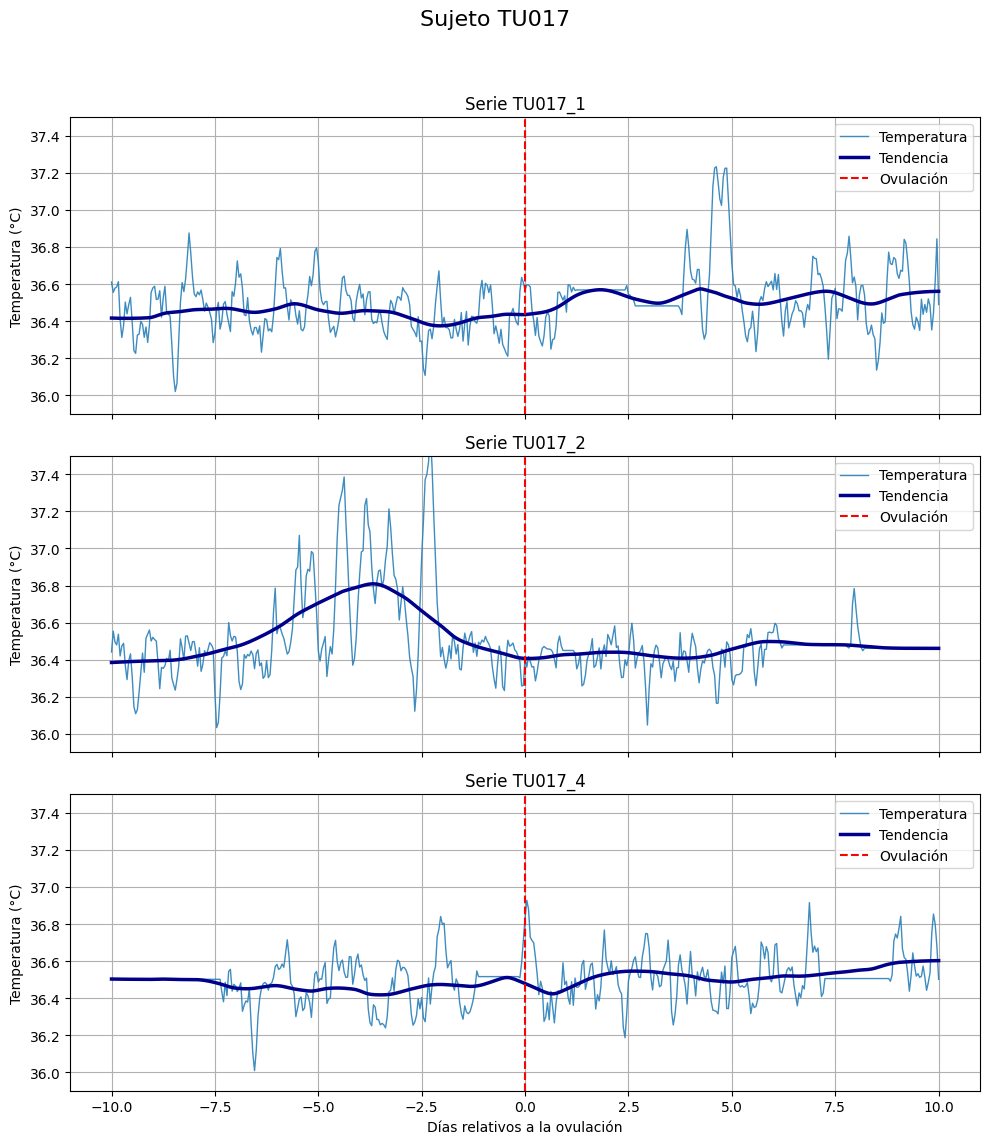

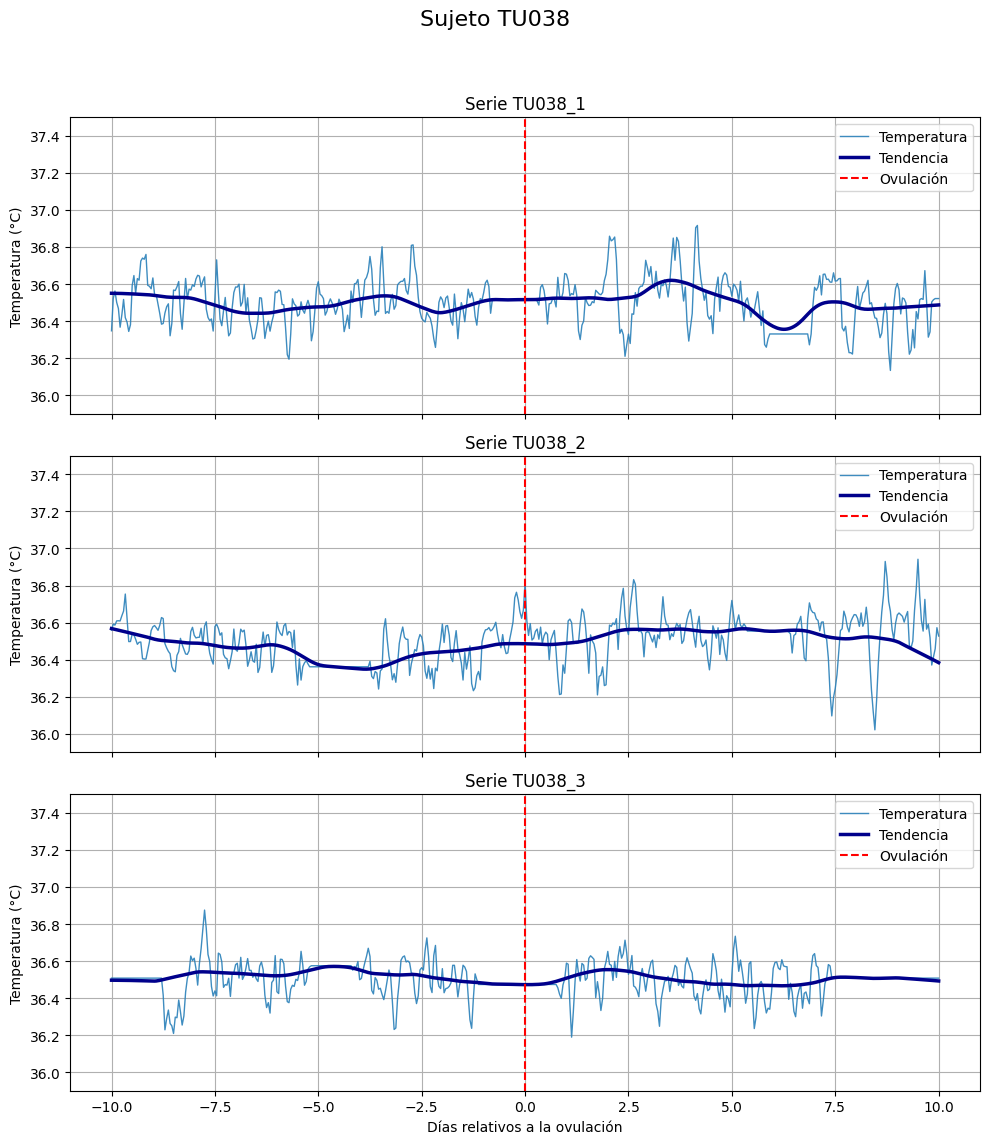

In [ ]:
sujetos_alta_variabilidad = ["TU017", "TU038"]

for id_sujeto in sujetos_alta_variabilidad:
    lista_series = series_por_sujeto[id_sujeto]

    n_series = len(lista_series)
    n_cols = 1
    n_rows = n_series

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows), sharex=True, sharey=True)
    fig.suptitle(f'Sujeto {id_sujeto}', fontsize=16)

    # Asegurar que axes es iterable
    if n_series == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, serie_id in enumerate(lista_series):
        df = muestras_ovul_tend[serie_id]["serie"].copy()

        # Calcular días relativos a la ovulación
        df["dias_rel"] = (df["resultTimestamp"] - fecha_ref) / pd.Timedelta(days=1)

        ax = axes[i]
        ax.plot(df["dias_rel"], df["result"], linewidth=1.0, alpha=0.9, color="#2980B9", label="Temperatura")
        ax.plot(df["dias_rel"], df["tendencia"], linewidth=2.5, color="darkblue", label="Tendencia")
        ax.axvline(x=0, color='red', linestyle='--', linewidth=1.5, label="Ovulación")

        ax.set_title(f'Serie {serie_id}')
        ax.set_ylim(35.9, 37.5)
        ax.grid(True)

        # Etiquetas solo en el último subplot
        if i == n_series - 1:
            ax.set_xlabel("Días relativos a la ovulación")
        ax.set_ylabel("Temperatura (°C)")

        ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
